# Project Description
The household goods store Everything Plus needs analysts to help us eliminate drabness and distribute coziness to every corner of the galaxy. Our tasks for the near future are to identify consumer profiles

Purpose: Segment users based on their consumer profiles

Link Slide Presentation: 
https://docs.google.com/presentation/d/1YELbL8syxiFOL3XyyPkCtrTrSejcR7u9bjo_tNS7LLk/edit?usp=sharing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.stats as stats
from scipy.stats import ttest_ind

In [2]:
ecomm = pd.read_csv('C:/Users/zaman/OneDrive/Desktop/Practicum/Project/Project 13/Final_project/ecommerce_dataset_us.csv',sep="\t")

# Data Preprocessing


In [3]:
ecomm

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680.0


In [4]:
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [5]:
ecomm.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [6]:
ecomm.duplicated().sum()

5268

In [7]:
ecomm.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Summary**

- InvoiceDate columns should in datetime format
- missing value in Description and CustomerID
- 5268 duplicated data

## Fix data

In [9]:
copy_ecomm = ecomm.copy()


**Change the data type**

In [11]:
copy_ecomm['InvoiceDate'] = pd.to_datetime(copy_ecomm['InvoiceDate'],format = '%m/%d/%Y %H:%M')
copy_ecomm['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 541909 entries, 0 to 541908
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----         
541909 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.1 MB


**Drop duplicated**

In [12]:
copy_ecomm.drop_duplicates(inplace=True)
copy_ecomm.duplicated().sum()

0

**Check the missing data** 

In [14]:
copy_ecomm[copy_ecomm['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,NaN
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,NaN
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,NaN
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,NaN
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN
...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2019-12-05 18:26:00,0.0,NaN
535326,581203,23406,NaN,15,2019-12-05 18:31:00,0.0,NaN
535332,581209,21620,NaN,6,2019-12-05 18:35:00,0.0,NaN
536981,581234,72817,NaN,27,2019-12-06 10:33:00,0.0,NaN


In [15]:
copy_ecomm[copy_ecomm['Description'].isna()].describe()

,Quantity,UnitPrice,CustomerID
count,1454.000000,1454.0,0.0
mean,-9.359697,0.0,NaN
std,243.238758,0.0,NaN
min,-3667.000000,0.0,NaN
25%,-24.000000,0.0,NaN
50%,-3.000000,0.0,NaN
75%,4.000000,0.0,NaN
max,5568.000000,0.0,NaN


**Observation**

- Data missing in description column also have missing value for customer id.
- The unit price also 0.
- Here, we can assumed that the data missing value and 0 price maybe caused by the human error because:
    - the workers seems to ignored the description, unitprice and customerID columns 
    - maybe because they want to work fast and forgot to include the fill in the columns 
- Therfore, the missing data in Description columns will be drop

In [16]:
copy_ecomm.dropna(subset = ['Description'], inplace=True)
copy_ecomm.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133583
dtype: int64

Now, lets check the missing value in CustomerID column

In [17]:
missing_id = copy_ecomm[copy_ecomm['CustomerID'].isna()]
missing_id

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,NaN
1447,536544,21790,VINTAGE SNAP CARDS,9,2018-11-29 14:32:00,1.66,NaN
...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2019-12-07 10:26:00,4.13,NaN
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2019-12-07 10:26:00,4.13,NaN
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2019-12-07 10:26:00,4.96,NaN
541539,581498,85174,S/4 CACTI CANDLES,1,2019-12-07 10:26:00,10.79,NaN


In [18]:
(missing_id[missing_id['Description'].str.contains(r'[a-z]')]['Description']).unique().tolist()

['BAG 125g SWIRLY MARBLES',
 'BAG 250g SWIRLY MARBLES',
 "Dr. Jam's Arouzer Stress Ball",
 'BAG 500g SWIRLY MARBLES',
 'Manual',
 'amazon',
 '3 TRADITIONAl BISCUIT CUTTERS  SET',
 'check',
 'damages',
 "Dad's Cab Electronic Meter",
 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
 'FRENCH BLUE METAL DOOR SIGN No',
 'Bank Charges',
 'NUMBER TILE VINTAGE FONT No ',
 '*Boombox Ipod Classic',
 'faulty',
 'Dotcom sales',
 'amazon sales',
 '*USB Office Mirror Ball',
 'Dotcomgiftshop Gift Voucher £40.00',
 'Found',
 'Dotcomgiftshop Gift Voucher £50.00',
 'reverse 21/5/10 adjustment',
 'Dotcomgiftshop Gift Voucher £30.00',
 'Dotcomgiftshop Gift Voucher £20.00',
 'POLYESTER FILLER PAD 65CMx65CM',
 'POLYESTER FILLER PAD 45x45cm',
 'mouldy, thrown away.',
 'found',
 'counted',
 'NUMBER TILE COTTAGE GARDEN No',
 'Given away',
 'Dotcom',
 'label mix up',
 'samples/damages',
 'POLYESTER FILLER PAD 40x40cm',
 'thrown away',
 'incorrectly made-thrown away.',
 'showroom',
 'Adjustment',
 'Dotcomgiftshop Gift Vo

In [19]:
removed_descr = ['Manual', 'amazon', 'check', 'damage', 'Bank Charges', 'faulty', 'Dotcom', 'mouldy', 'Found', 'thrown', 
                 'found', 'counted', 'Given', 'mix up', 'showroom', 'Adjustment', 'sold', 'broken', 'wrong', 'problem', 
                 'lost', 'dotcom', 'Amazon', 'cracked', 'mystery', 'credit', 'adjust', 'crush', 'sample', 'mailout', 
                 'delivery', 'Thrown', 'wet', 'cargo', 'smash', 'miss', 'stock', 'Samples', 'mould', 'came', 'section', 
                 'ebay', 'debt', 'display', 'Crush', 'test', 'online', 'Found', 'Dagamed', 'Damage', 'historic', 'incorr', 
                 'oops', 'find', 'Wet', 'error', 'aside', 'Breakages', 'Unsaleable','Display','Missing','fixed','Marked',
                 'Wrongly','rusty','mixed','throw','DOT','AMAZON','POST','CARRIAGE','SAMPLES']
missing_id = missing_id[~missing_id['Description'].str.contains('|'.join(removed_descr))]
(missing_id[missing_id['Description'].str.contains(r'[a-z]')]['Description']).unique().tolist()

['BAG 125g SWIRLY MARBLES',
 'BAG 250g SWIRLY MARBLES',
 "Dr. Jam's Arouzer Stress Ball",
 'BAG 500g SWIRLY MARBLES',
 '3 TRADITIONAl BISCUIT CUTTERS  SET',
 "Dad's Cab Electronic Meter",
 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
 'FRENCH BLUE METAL DOOR SIGN No',
 'NUMBER TILE VINTAGE FONT No ',
 '*Boombox Ipod Classic',
 '*USB Office Mirror Ball',
 'POLYESTER FILLER PAD 65CMx65CM',
 'POLYESTER FILLER PAD 45x45cm',
 'NUMBER TILE COTTAGE GARDEN No',
 'POLYESTER FILLER PAD 40x40cm',
 'POLYESTER FILLER PAD 45x30cm',
 'returned',
 'THE KING GIFT BAG 25x24x12cm',
 'John Lewis']

In [20]:
(missing_id[missing_id['Description'].str.contains(r'[A-Z]')]['Description']).unique().tolist()

['DECORATIVE ROSE BATHROOM BOTTLE',
 'DECORATIVE CATS BATHROOM BOTTLE',
 'RAIN PONCHO RETROSPOT',
 'VINTAGE SNAP CARDS',
 'VINTAGE HEADS AND TAILS CARD GAME ',
 'CHRISTMAS TREE DECORATION WITH BELL',
 'CHRISTMAS TREE HEART DECORATION',
 'CHRISTMAS TREE STAR DECORATION',
 'CHRISTMAS HANGING TREE WITH BELL',
 'CHRISTMAS HANGING STAR WITH BELL',
 'CHRISTMAS HANGING HEART WITH BELL',
 'GLITTER STAR GARLAND WITH BELLS ',
 'GLITTER CHRISTMAS TREE WITH BELLS',
 'PAINTED METAL HEART WITH HOLLY BELL',
 'RED RETROSPOT MUG',
 'LILAC DIAMANTE PEN IN GIFT BOX',
 'I CAN ONLY PLEASE ONE PERSON MUG',
 'SAVE THE PLANET MUG',
 'GIN AND TONIC MUG',
 'HEARTS GIFT TAPE',
 'CAKES AND BOWS GIFT  TAPE',
 'BINGO SET',
 'WOODEN BOX OF DOMINOES',
 'TRADITIONAL WOODEN CATCH CUP GAME ',
 'POTTING SHED SEED ENVELOPES',
 'GARDEN METAL SIGN ',
 'VINTAGE SNAKES & LADDERS',
 'VINTAGE SEASIDE JIGSAW PUZZLES',
 'BLUE HARMONICA IN BOX ',
 'RED  HARMONICA IN BOX ',
 'UNION STRIPE WITH FRINGE  HAMMOCK',
 'JUMBO BAG SCANDINA

check stock code

In [21]:
(missing_id[~missing_id['StockCode'].astype(str).str.len().between(5, 6)])['StockCode'].unique()

array(['15056bl', '15056BL', 'DCGS0076', 'DCGS0003', 'DCGS0070',
       'DCGS0069', 'DCGSSBOY', 'DCGSSGIRL', 'DCGS0004'], dtype=object)

In [22]:
copy_ecomm.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133583
dtype: int64

**Check the stock code**

In [24]:
list_rare_code = (copy_ecomm[~copy_ecomm['StockCode'].astype(str).str.len().between(5, 6)])['StockCode'].unique()
list_rare_code

array(['POST', '15056BL', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES',
       '15056bl', 'S', 'AMAZONFEE', 'DCGS0076', 'DCGS0003',
       'gift_0001_40', 'DCGS0070', 'm', 'gift_0001_50', 'gift_0001_30',
       'gift_0001_20', 'DCGS0069', 'DCGSSBOY', 'DCGSSGIRL',
       'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073', 'DCGS0068',
       'DCGS0067', 'B', 'CRUK', '79323GR', '79323LP'], dtype=object)

In [25]:
copy_ecomm[copy_ecomm['StockCode']=='D']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527.0
9038,C537164,D,Discount,-1,2018-12-03 13:21:00,29.29,14527.0
14498,C537597,D,Discount,-1,2018-12-05 12:34:00,281.00,15498.0
19392,C537857,D,Discount,-1,2018-12-06 16:00:00,267.12,17340.0
31134,C538897,D,Discount,-1,2018-12-13 09:14:00,5.76,16422.0
...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,2019-11-16 12:06:00,19.82,14527.0
479869,C577227,D,Discount,-1,2019-11-16 12:06:00,16.76,14527.0
493613,C578239,D,Discount,-1,2019-11-21 12:29:00,26.33,14912.0
516221,C579884,D,Discount,-1,2019-11-28 17:34:00,20.53,14527.0


Discount doesnt need to drop because it also tells some information about customer purchase behaviour

**Check description**

In [28]:
lower_desc = copy_ecomm[copy_ecomm['Description'].str.contains(r'[a-z]')]
lower_desc['Description'].unique()

array(['Discount', 'BAG 500g SWIRLY MARBLES',
       'POLYESTER FILLER PAD 45x45cm', 'BAG 125g SWIRLY MARBLES',
       'BAG 250g SWIRLY MARBLES', 'POLYESTER FILLER PAD 45x30cm',
       'POLYESTER FILLER PAD 40x40cm', 'FRENCH BLUE METAL DOOR SIGN No',
       'Manual', "Dr. Jam's Arouzer Stress Ball",
       '3 TRADITIONAl BISCUIT CUTTERS  SET', 'Bank Charges',
       'NUMBER TILE COTTAGE GARDEN No', 'amazon',
       'FOLK ART GREETING CARD,pack/12',
       'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
       'POLYESTER FILLER PAD 65CMx65CM', 'check', 'damages',
       "Dad's Cab Electronic Meter", 'NUMBER TILE VINTAGE FONT No ',
       '*Boombox Ipod Classic', 'faulty', 'Dotcom sales', 'amazon sales',
       '*USB Office Mirror Ball', 'POLYESTER FILLER PAD 30CMx30CM',
       'Dotcomgiftshop Gift Voucher £40.00', 'Found',
       'Dotcomgiftshop Gift Voucher £50.00', 'reverse 21/5/10 adjustment',
       'Dotcomgiftshop Gift Voucher £30.00',
       'Dotcomgiftshop Gift Voucher £20.00', 'mouldy, t

Looks the description for lowercase can tells about customer purchase behaviour

## Enrich data

In [30]:
copy_ecomm['Date'] = copy_ecomm['InvoiceDate'].dt.date
copy_ecomm['Date'] = pd.to_datetime(copy_ecomm['Date'],format = '%Y-%m-%d')
copy_ecomm['Time'] = copy_ecomm['InvoiceDate'].dt.time
copy_ecomm['Month'] = copy_ecomm['InvoiceDate'].dt.strftime('%Y-%m')

In [32]:
copy_ecomm.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Date,Time,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29,08:26:00,2018-11
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,08:26:00,2018-11
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29,08:26:00,2018-11
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,08:26:00,2018-11
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,08:26:00,2018-11


Create 1 year transaction

In [34]:
copy_ecomm = copy_ecomm[(copy_ecomm['InvoiceDate'] >= '2018-12-01 00:00:00') & (copy_ecomm['InvoiceDate'] < '2019-12-01 00:00:00')]
print (copy_ecomm['InvoiceDate'].min())
print(copy_ecomm['InvoiceDate'].max())

2018-12-01 09:31:00
2019-11-30 17:59:00


In [35]:
print(ecomm.shape)
print(copy_ecomm.shape)

(541909, 7)
(510552, 10)


9% loss from original data. 

# EDA

## Separate transaction and returned data

In [38]:
transaction_data = copy_ecomm[~copy_ecomm['InvoiceNo'].str.startswith('C')]
transaction_data.sort_values(by='Quantity',ascending=True).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Date,Time,Month
225530,556691,23005,printing smudges/thrown away,-9600,2019-06-12 10:37:00,0.0,NaN,2019-06-12,10:37:00,2019-06
225529,556690,23005,printing smudges/thrown away,-9600,2019-06-12 10:37:00,0.0,NaN,2019-06-12,10:37:00,2019-06
225528,556687,23003,Printing smudges/thrown away,-9058,2019-06-12 10:36:00,0.0,NaN,2019-06-12,10:36:00,2019-06
115818,546152,72140F,throw away,-5368,2019-03-07 17:25:00,0.0,NaN,2019-03-07,17:25:00,2019-03
431381,573596,79323W,"Unsaleable, destroyed.",-4830,2019-10-29 15:17:00,0.0,NaN,2019-10-29,15:17:00,2019-10


In [39]:
returned_data = copy_ecomm[copy_ecomm['InvoiceNo'].str.startswith('C')]
returned_data.sort_values(by='Quantity',ascending=True).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Date,Time,Month
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2019-01-16 10:17:00,1.04,12346.0,2019-01-16,10:17:00,2019-01
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2019-04-16 13:08:00,2.10,15749.0,2019-04-16,13:08:00,2019-04
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2019-04-16 13:08:00,1.85,15749.0,2019-04-16,13:08:00,2019-04
160143,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2019-04-16 13:08:00,2.55,15749.0,2019-04-16,13:08:00,2019-04
224419,C556522,22920,HERB MARKER BASIL,-1515,2019-06-11 11:21:00,0.55,16938.0,2019-06-11,11:21:00,2019-06


## Quantity range for analysis

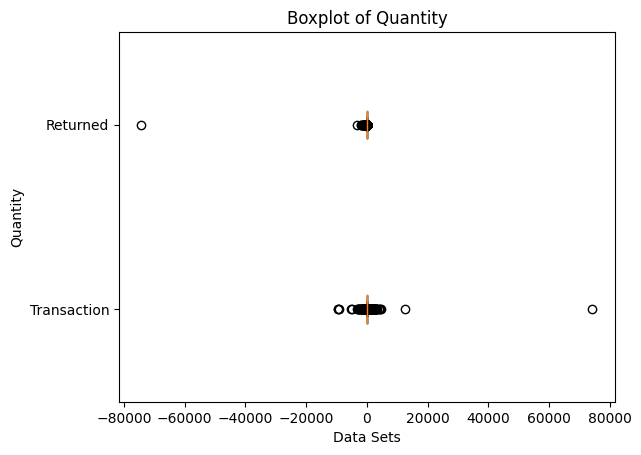

In [41]:
boxplot_quantity = [transaction_data['Quantity'], returned_data['Quantity']]

plt.boxplot(boxplot_quantity, labels=['Transaction', 'Returned'],vert=False)
plt.xlabel('Data Sets')
plt.ylabel('Quantity')
plt.title('Boxplot of Quantity')
plt.show()

Lets remove the obvious outliers 

In [42]:
transaction_data = transaction_data[transaction_data['Quantity']<= 10000]
returned_data = returned_data[returned_data['Quantity']>= -10000]

see the boxplot again

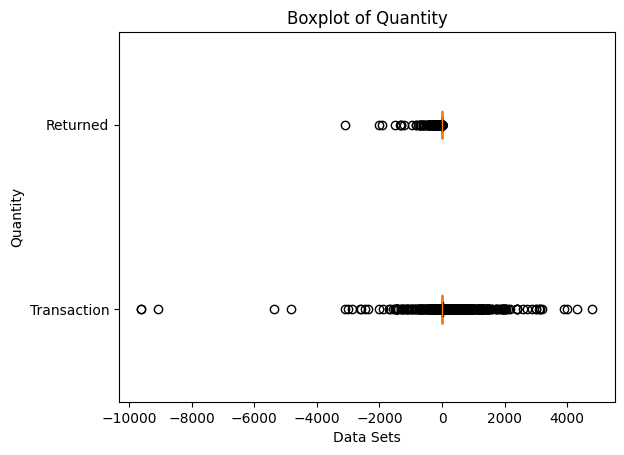

In [44]:
boxplot_quantity = [transaction_data['Quantity'], returned_data['Quantity']]

plt.boxplot(boxplot_quantity, labels=['Transaction', 'Returned'],vert=False)
plt.xlabel('Data Sets')
plt.ylabel('Quantity')
plt.title('Boxplot of Quantity')
plt.show()

We cant see the box. Lets remove the 5% from the transaction and and returned data.

In [46]:
thresold_min_tr,thresold_max_tr = transaction_data['Quantity'].quantile([0.05,0.95])
thresold_min_rt,thresold_max_rt = returned_data['Quantity'].quantile([0.05,0.95])
print (thresold_min_tr,thresold_max_tr)
print (thresold_min_rt,thresold_max_rt)

1.0 30.0
-36.0 -1.0


In [47]:
transaction_data = transaction_data[(transaction_data['Quantity']<=thresold_max_tr) & (transaction_data['Quantity']>=thresold_min_tr)]
returned_data = returned_data[(returned_data['Quantity']>=thresold_min_rt) & (returned_data['Quantity']<=thresold_max_rt)]

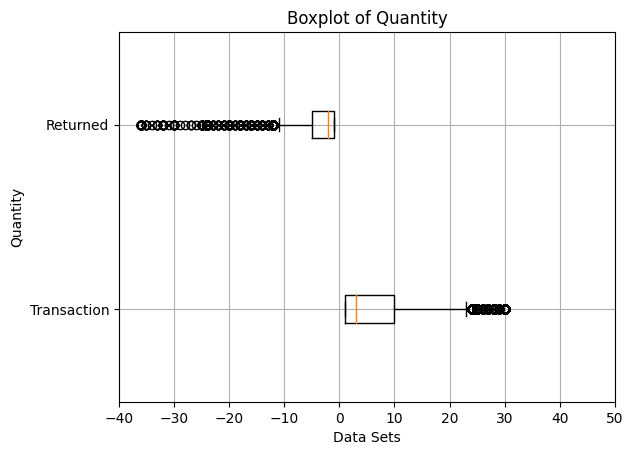

In [48]:
boxplot_quantity = [transaction_data['Quantity'], returned_data['Quantity']]

plt.boxplot(boxplot_quantity, labels=['Transaction', 'Returned'],vert=False)
plt.xlim(-40, 50)
plt.xlabel('Data Sets')
plt.ylabel('Quantity')
plt.title('Boxplot of Quantity')
plt.grid()
plt.show()

30 quantity in transaction and 36 returned is acceptable and reasonable quantity.

## Unit price for analysis

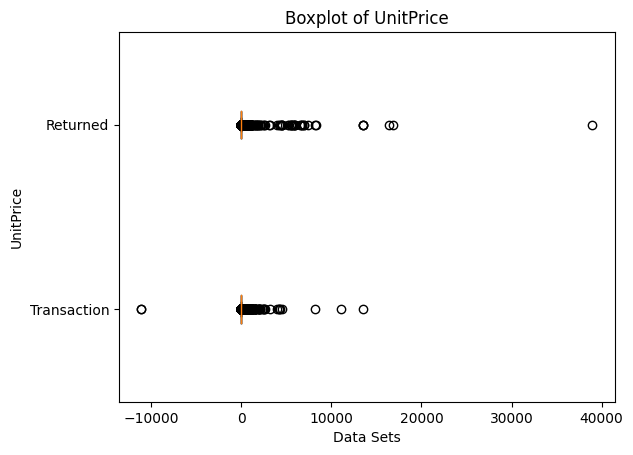

In [50]:
boxplot_quantity = [transaction_data['UnitPrice'], returned_data['UnitPrice']]

plt.boxplot(boxplot_quantity, labels=['Transaction', 'Returned'],vert=False)
plt.xlabel('Data Sets')
plt.ylabel('UnitPrice')
plt.title('Boxplot of UnitPrice')
plt.show()


Lets remove the obvious outliers 

In [51]:
transaction_data = transaction_data[transaction_data['UnitPrice']<= 250]
returned_data = returned_data[returned_data['UnitPrice']<= 250]

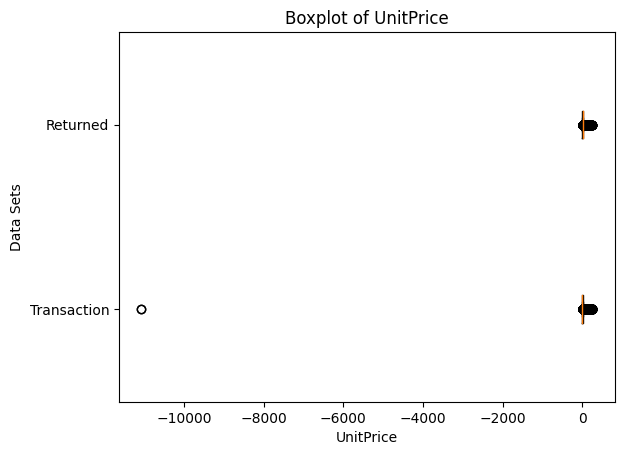

In [52]:
boxplot_quantity = [transaction_data['UnitPrice'], returned_data['UnitPrice']]

plt.boxplot(boxplot_quantity, labels=['Transaction', 'Returned'],vert=False)
plt.xlabel('UnitPrice')
plt.ylabel('Data Sets')
plt.title('Boxplot of UnitPrice')
plt.show()


Lets sets the threshold to 1%

In [53]:
min_thresold_price,max_thresold_price = returned_data['UnitPrice'].quantile([0.05,0.95])
print(min_thresold_price,max_thresold_price)

0.65 14.95


In [54]:
transaction_data = transaction_data[(transaction_data['UnitPrice']<=max_thresold_price)&(transaction_data['UnitPrice']>=min_thresold_price)]
returned_data = returned_data[(returned_data['UnitPrice']<=max_thresold_price)&(returned_data['UnitPrice']>=min_thresold_price)]

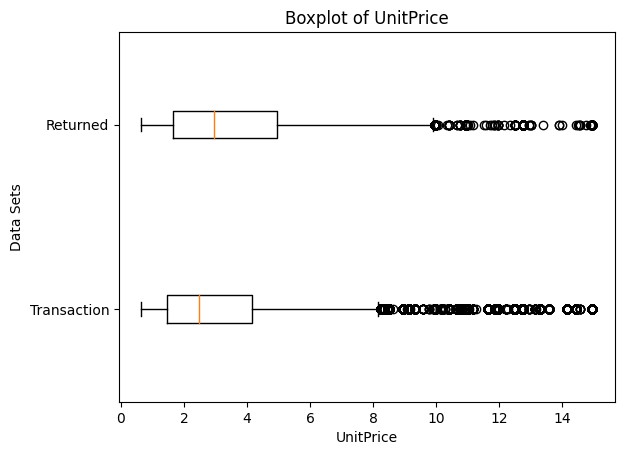

In [55]:
boxplot_quantity = [transaction_data['UnitPrice'], returned_data['UnitPrice']]

plt.boxplot(boxplot_quantity, labels=['Transaction', 'Returned'],vert=False)
plt.xlabel('UnitPrice')
plt.ylabel('Data Sets')
plt.title('Boxplot of UnitPrice')
plt.show()

The Unit price looks acceptable

##  Customer Profile for a year

Lets group the buyers spending for a year

In [56]:
transaction_data['Total_payment'] = transaction_data['Quantity'] * transaction_data['UnitPrice']
transaction_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Date,Time,Month,Total_payment
5219,536847,22161,HEART DECORATION RUSTIC HANGING,24,2018-12-01 09:31:00,0.65,17135.0,2018-12-01,09:31:00,2018-12,15.6
5220,536847,22065,CHRISTMAS PUDDING TRINKET POT,24,2018-12-01 09:31:00,1.45,17135.0,2018-12-01,09:31:00,2018-12,34.8
5221,536847,20956,PORCELAIN T-LIGHT HOLDERS ASSORTED,12,2018-12-01 09:31:00,1.25,17135.0,2018-12-01,09:31:00,2018-12,15.0
5222,536847,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2018-12-01 09:31:00,2.55,17135.0,2018-12-01,09:31:00,2018-12,15.3
5223,536847,21231,SWEETHEART CERAMIC TRINKET BOX,24,2018-12-01 09:31:00,1.25,17135.0,2018-12-01,09:31:00,2018-12,30.0


In [57]:
spending = transaction_data.groupby(['CustomerID']).agg(
    {'Total_payment': 'sum'})
spending.columns = ['Total_payment_year']
spending = spending.reset_index()
spending 

,CustomerID,Total_payment_year
0,12347.0,3243.62
1,12348.0,37.40
2,12349.0,1242.80
3,12350.0,294.40
4,12352.0,1385.74
...,...,...
4149,18280.0,180.60
4150,18281.0,31.80
4151,18282.0,159.09
4152,18283.0,1736.45


Lets create profile spending for customer based on the classification income percentage in Malaysia. 40% first for low spending, 40% next for moderate spending, and last 20% for high spending.

In [59]:
low_spend_profile,moderate_spend_profile = spending['Total_payment_year'].quantile([0.40,0.80])
print(low_spend_profile,moderate_spend_profile )

375.732 1489.25


In [60]:
profile = {
    'Profile': ['Low', 'Medium', 'High'],
    'Quantile': ['<=40%', '<80%', '>80%'],
    'Total Amount': ['<= 375.73', '< 1489.25', '=> 1489.25']
}

profile = pd.DataFrame(profile)
profile

,Profile,Quantile,Total Amount
0,Low,<=40%,<= 375.73
1,Medium,<80%,< 1489.25
2,High,>80%,=> 1489.25


In [61]:
# create a function to classify the spend profile
def classify_profile(row):
    if row['Total_payment_year'] <= (spending['Total_payment_year'].quantile(0.4)):
        return 'low'
    if row['Total_payment_year'] > (spending['Total_payment_year'].quantile(0.8)):
        return 'high'
    else:
        return 'moderate'

# apply the function to create the 'profile_spend' column
spending['Profile_spend'] = spending.apply(classify_profile, axis=1)

# print the resulting dataframe
spending.columns = ['CustomerID','Total_payment_year','Profile_spend_year']
spending 

,CustomerID,Total_payment_year,Profile_spend_year
0,12347.0,3243.62,high
1,12348.0,37.40,low
2,12349.0,1242.80,moderate
3,12350.0,294.40,low
4,12352.0,1385.74,moderate
...,...,...,...
4149,18280.0,180.60,low
4150,18281.0,31.80,low
4151,18282.0,159.09,low
4152,18283.0,1736.45,high


In [62]:
transaction_data = pd.merge(transaction_data,spending, on='CustomerID')
transaction_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Date,Time,Month,Total_payment,Total_payment_year,Profile_spend_year
0,536847,22161,HEART DECORATION RUSTIC HANGING,24,2018-12-01 09:31:00,0.65,17135.0,2018-12-01,09:31:00,2018-12,15.6,603.45,moderate
1,536847,22065,CHRISTMAS PUDDING TRINKET POT,24,2018-12-01 09:31:00,1.45,17135.0,2018-12-01,09:31:00,2018-12,34.8,603.45,moderate
2,536847,20956,PORCELAIN T-LIGHT HOLDERS ASSORTED,12,2018-12-01 09:31:00,1.25,17135.0,2018-12-01,09:31:00,2018-12,15.0,603.45,moderate
3,536847,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2018-12-01 09:31:00,2.55,17135.0,2018-12-01,09:31:00,2018-12,15.3,603.45,moderate
4,536847,21231,SWEETHEART CERAMIC TRINKET BOX,24,2018-12-01 09:31:00,1.25,17135.0,2018-12-01,09:31:00,2018-12,30.0,603.45,moderate


In [63]:
returned_data = pd.merge(returned_data,spending[['CustomerID','Profile_spend_year']], on='CustomerID')
returned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Date,Time,Month,Profile_spend_year
0,C536854,22158,3 HEARTS HANGING DECORATION RUSTIC,-1,2018-12-01 10:09:00,2.95,15240.0,2018-12-01,10:09:00,2018-12,moderate
1,C536854,22944,CHRISTMAS METAL POSTCARD WITH BELLS,-1,2018-12-01 10:09:00,1.25,15240.0,2018-12-01,10:09:00,2018-12,moderate
2,C536854,21871,SAVE THE PLANET MUG,-1,2018-12-01 10:09:00,1.25,15240.0,2018-12-01,10:09:00,2018-12,moderate
3,C543779,22083,PAPER CHAIN KIT RETROSPOT,-4,2019-02-09 16:32:00,2.95,15240.0,2019-02-09,16:32:00,2019-02,moderate
4,C543779,21218,RED SPOTTY BISCUIT TIN,-1,2019-02-09 16:32:00,3.75,15240.0,2019-02-09,16:32:00,2019-02,moderate


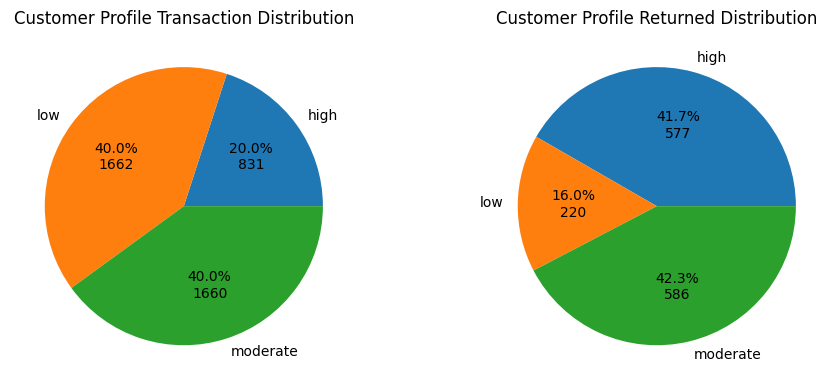

In [64]:
profile_count = transaction_data.groupby('Profile_spend_year').agg({'CustomerID':'nunique'}).reset_index()
returned_distribution = returned_data.groupby('Profile_spend_year').agg({'CustomerID':'nunique'}).reset_index()

# Create the pie charts
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[1].pie(returned_distribution['CustomerID'], labels=returned_distribution['Profile_spend_year'], autopct=lambda pct: f"{pct:.1f}%\n{int(pct/100*sum(returned_distribution['CustomerID']))}")
axs[0].pie(profile_count['CustomerID'], labels=profile_count['Profile_spend_year'], autopct=lambda pct: f"{pct:.1f}%\n{int(pct/100*sum(profile_count['CustomerID']))}")

# Add titles
axs[1].set_title('Customer Profile Returned Distribution')
axs[0].set_title('Customer Profile Transaction Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Display the charts
plt.show()

## Analysis based on time period

### Total payment in transaction per month

In [66]:
transaction_per_month = (transaction_data.groupby('Month').agg({'Total_payment':'sum'})).reset_index()
transaction_per_month

,Month,Total_payment
0,2018-12,284855.13
1,2019-01,304155.86
2,2019-02,259782.33
3,2019-03,327362.20
4,2019-04,271162.42
5,2019-05,408048.74
6,2019-06,323777.70
7,2019-07,344783.64
8,2019-08,355407.49
9,2019-09,504388.21


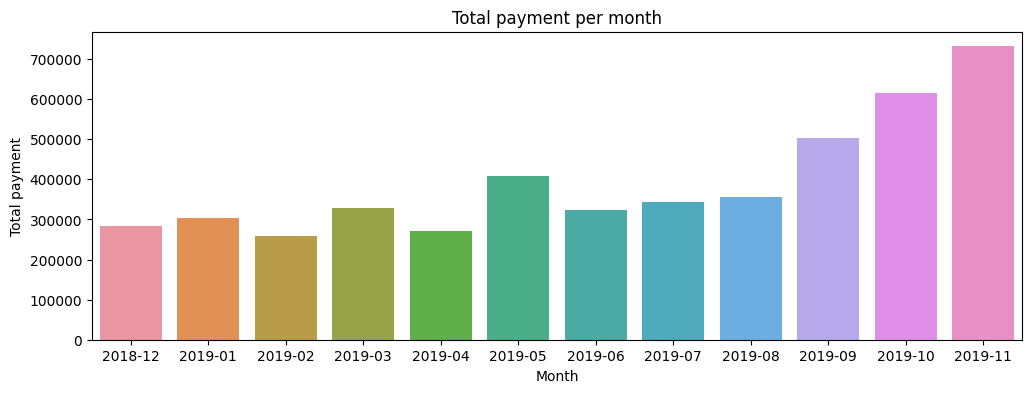

In [67]:
plt.subplots(figsize=(12, 4))
sns.barplot(data=transaction_per_month, x="Month", y="Total_payment")

plt.xlabel('Month')
plt.ylabel('Total payment')
plt.title('Total payment per month')

plt.show()

**Summary**

- **Monthly total payment fluctuations:** The total payment varies from month to month, indicating fluctuations in profit. For example, there is a noticeable increase in profit from January 2019 to May 2019, followed by a decrease in June 2019.


- **Seasonal Trends:** By observing the monthly profit figures, there are potential seasonal trends or patterns in the business. For instance, there a consistent increase or decrease in profit during certain months across multiple years, it may indicate the influence of seasonal factors.


- **Growth and Decline:** Comparing the total payment figures over consecutive months, it can determine where the periods of growth or decline in the business. For instance, there is a significant increase in profit from September 2019 to November 2019. Here, we can assumed that there will be an increased in payment transaction during December 2019 and it much higher compared with December 2018. 


- **Identify Peaks and Troughs:** Look for months with exceptionally high or low profits compared to the surrounding months. These peaks and troughs can provide insights into events, campaigns, or external factors that affected the business during those periods.


- **Establishing Goals:** By analyzing the data, we can set realistic and achievable goals for the business. For example, we can create a goals for December 2019 and for the next year target that can aim to surpass the highest profit month in the following year or we can identify months where improvement is required like in February, April, and June where the fluctuation happens.


Last but not least, it is important to note that this summary is based solely on the provided data and does not take into account external factors or provide a comprehensive analysis. Additional data points and conduct a more thorough examination using appropriate statistical methods are needed would be beneficial to gain a deeper understanding with the trends and why it occurs during that time.

### Number of customer that do transaction per month

In [69]:
buyers_per_month = (transaction_data.groupby('Month').agg({'CustomerID':'nunique'})).reset_index()
buyers_per_month.columns = ['Month','Customer_count']
buyers_per_month

,Month,Customer_count
0,2018-12,732
1,2019-01,768
2,2019-02,702
3,2019-03,906
4,2019-04,788
5,2019-05,1035
6,2019-06,933
7,2019-07,927
8,2019-08,897
9,2019-09,1161


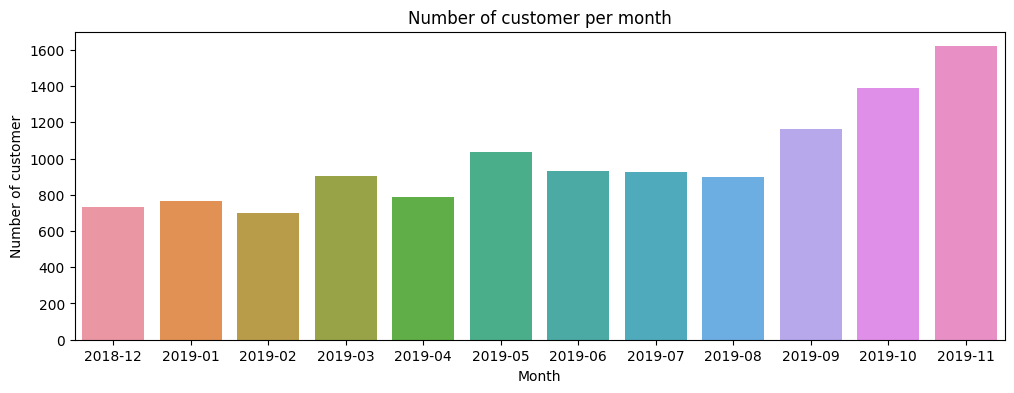

In [70]:
plt.subplots(figsize=(12, 4))
sns.barplot(data=buyers_per_month, x="Month", y="Customer_count")

plt.xlabel('Month')
plt.ylabel('Number of customer')
plt.title('Number of customer per month')

plt.show()

**Summary**

- **Customer Count Fluctuations:** The number of customers varies from month to month, indicating fluctuations in customer activity or behavior. For example, there is an increase in customer count from January 2019 to March 2019, followed by a slight decrease in April 2019.


- **Seasonal Trends:** By observing the monthly customer count figures, there are a potential seasonal trends or patterns in customer behavior. For instance, there are a consistent increase or decrease in customer count during certain months that may indicate the influence of seasonal factors on customer engagement.


- **Growth and Decline:** Comparing the customer count figures over consecutive months, we can see the trend for the periods of growth or decline in customer engagement for 1 year periods. For instance, there is a significant increase and decrease in the customer count from December 2018 to November 2019.


- **Customer Acquisition and Retention:** The customer count data allows to assess the effectiveness of for the customer acquisition and retention strategies. For example, if there are consistent increases in customer count, it may indicate successful acquisition efforts. Conversely, if there are declines in customer count, it may signal a need to focus on customer retention strategies.


- **Forecasting and Planning:** By understanding the fluctuations and trends in customer count, we has some information to  forecasts and plans for future ecommerce operations. This information can help to allocate resources, adjust marketing strategies, and optimize customer engagement initiatives.

Last but not least, it is important to note that this summary is based solely on the provided data and does not take into account external factors or provide a comprehensive analysis. Additional data points and conduct a more thorough examination using appropriate statistical methods are needed would be beneficial to gain a deeper understanding with the trends and why it occurs during that time.

### Relationship between the number of customer and the total payment in transaction per month  

In [71]:
customer_transaction_rel =  pd.merge(buyers_per_month,transaction_per_month,on='Month')
customer_transaction_rel

,Month,Customer_count,Total_payment
0,2018-12,732,284855.13
1,2019-01,768,304155.86
2,2019-02,702,259782.33
3,2019-03,906,327362.20
4,2019-04,788,271162.42
5,2019-05,1035,408048.74
6,2019-06,933,323777.70
7,2019-07,927,344783.64
8,2019-08,897,355407.49
9,2019-09,1161,504388.21


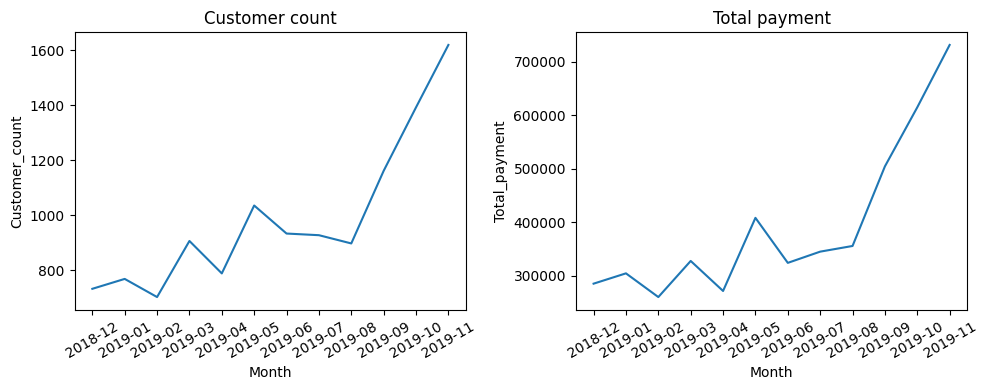

In [72]:
# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# plot the histogram of transaction data on the first subplot
sns.lineplot(data=customer_transaction_rel, x='Month',y='Customer_count', ax=axs[0])
axs[0].set_title('Customer count')
axs[0].tick_params(axis='x', rotation=30)

# plot the histogram of returned data on the second subplot
sns.lineplot(data=customer_transaction_rel, x='Month',y='Total_payment', ax=axs[1])
axs[1].set_title('Total payment')
axs[1].tick_params(axis='x', rotation=30)

# adjust the layout and show the plot
plt.tight_layout()
plt.show()

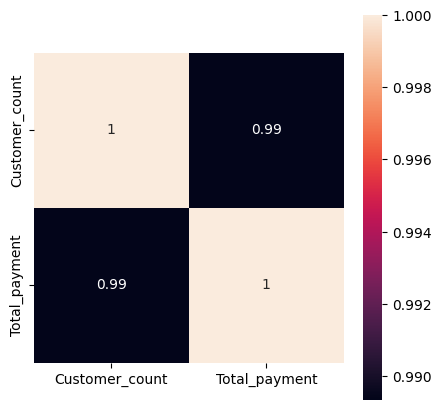

In [73]:
# build and render a correlation matrix
ct_cor = customer_transaction_rel.corr() # calculate correlation matrix
fig, ax = plt.subplots(figsize =(5, 5))

# plot an annotated heatmap for the correlation matrix
sns.heatmap(ct_cor, annot = True, square=True) 
plt.show()

**Summary**

- **Correlation:** A positive correlation between customer count and total payment meaning that as the number of customers increases, the total payment also tends to increase. It means that more customers would contribute to higher revenue.


- **Outliers:** Sharp increase in both customer count and total payment between September 2019 and October 2019. This significant jump could be attributed to specific events or promotions during that period, which attracted a larger customer base and resulted in higher payments.

Overall, while the customer count and total payment exhibit a positive relationship and show an increasing trend over time.  Further analysis and consideration of other variables may provide deeper insights into this relationship.

## Analysis based on Customer Profile 

### Relationship between Customer profile and the average quantity

In [75]:
quantity_spend_trend = transaction_data.groupby(['Profile_spend_year','Month']).agg({'Quantity':'mean'})
quantity_spend_trend = quantity_spend_trend.reset_index()
quantity_spend_trend.columns = ['Profile_spend_year','Month','Avg Quantity']
quantity_spend_trend

,Profile_spend_year,Month,Avg Quantity
0,high,2018-12,6.891155
1,high,2019-01,6.810662
2,high,2019-02,6.693534
3,high,2019-03,6.526612
4,high,2019-04,6.884061
5,high,2019-05,6.923603
6,high,2019-06,6.744766
7,high,2019-07,7.246687
8,high,2019-08,7.363704
9,high,2019-09,7.027994


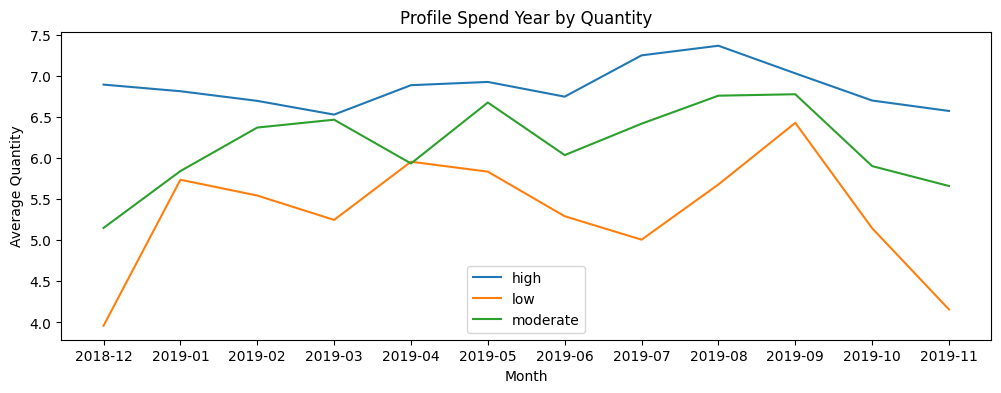

In [76]:
plt.subplots(figsize=(12, 4))
sns.lineplot(data=quantity_spend_trend, x="Month", y="Avg Quantity", hue="Profile_spend_year")

plt.xlabel('Month')
plt.ylabel('Average Quantity')
plt.title('Profile Spend Year by Quantity')

plt.legend()
plt.show()

**Summary**

- **Spending Profile:** The data is divided into three spending profiles: high, low, and moderate. These profiles suggest different spending levels of expenditure for the given time period.

- **Comparison of Profiles:** By comparing the spending patterns across the different profiles, founded that there are consistent differences in average quantity between all customer profiles. 'High' customer profile tends to buy in with the consistent quantity, while 'moderate' customer profile a bit varied in average quantity, and last the 'low' customer profile a bit unpredictable in terms of average quantity.

Deeper investigation is needed to gain more accurate conclusions and reasons.

### Relationship between Customer profile and the Unit Price

Lets see if the customer for each profile favour for a items price in average

In [77]:
unitpice_favour = transaction_data.groupby(['Profile_spend_year','Month']).agg({'UnitPrice':'mean'})
unitpice_favour = unitpice_favour.reset_index()
unitpice_favour

,Profile_spend_year,Month,UnitPrice
0,high,2018-12,3.210771
1,high,2019-01,3.287080
2,high,2019-02,3.276258
3,high,2019-03,3.100028
4,high,2019-04,3.064394
5,high,2019-05,3.245840
6,high,2019-06,3.206145
7,high,2019-07,3.030957
8,high,2019-08,3.017352
9,high,2019-09,3.045135


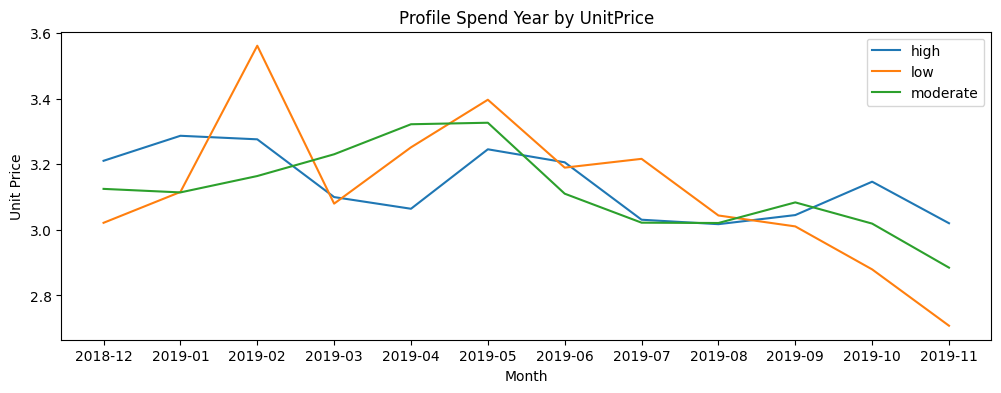

In [78]:
plt.subplots(figsize=(12, 4))
sns.lineplot(data=unitpice_favour, x="Month", y="UnitPrice", hue="Profile_spend_year")

plt.xlabel('Month')
plt.ylabel('Unit Price')
plt.title('Profile Spend Year by UnitPrice')

plt.legend()
plt.show()

**Summary**

- **Spending Profile:** The data is divided into three spending profiles: high, low, and moderate. These profiles suggest different spending levels of expenditure for the given time period.


- **Seasonality:** By analyzing the "Month" column, we can observe monthly trends and seasonal patterns. For example, there might be certain months where all the customer profiles were go higher and go lower for a certain month.


- **Comparison of Profiles:** By comparing the spending patterns across the different profiles, founded that there are consistent differences in average unit price between all customer profiles. 'High' customer profile tends to buy in with the consistent price, while 'moderate' customer profile a bit varied in average price, and last the 'low' customer profile a bit unpredictable in terms of average price.

Deeper investigation is needed to gain more accurate conclusions and reasons.

###  Relationship between Customer profile and the returned unit price

In [79]:
high_returned = returned_data[returned_data['Profile_spend_year'] == 'high']
moderate_returned = returned_data[returned_data['Profile_spend_year'] == 'moderate']
low_returned = returned_data[returned_data['Profile_spend_year'] == 'low']

Text(0.5, 1.0, 'Low Profile Returned Unit Price')

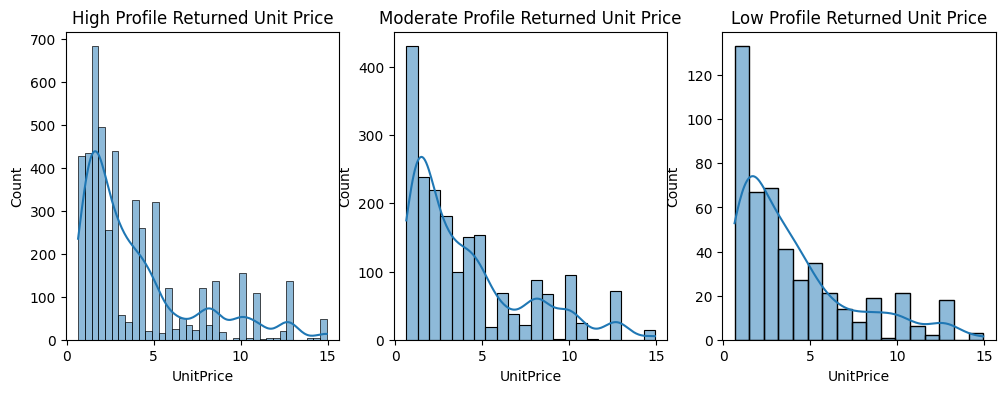

In [80]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(data=high_returned, x='UnitPrice', kde=True, ax=axs[0])
axs[0].set_title('High Profile Returned Unit Price')

sns.histplot(data=moderate_returned, x='UnitPrice', kde=True, ax=axs[1])
axs[1].set_title('Moderate Profile Returned Unit Price')

sns.histplot(data=low_returned, x='UnitPrice', kde=True, ax=axs[2])
axs[2].set_title('Low Profile Returned Unit Price')

**Summary**

- **Return Patterns:** All the customer profile have the almost the same pattern of kde. It means that the price for returned units are same across all the customer profile.   


- **Impact for cheap priced units :** Most returned units majority from the cheap units less than $2.5. The reason maybe due too the cheap product has less quality that can malfunction quickly or break easily with the small force especially during shipping. 


- **Impact for expensive priced units :** Some expensive priced units also being returned, although they are relatively less common. Expensive priced units have better quality that may the reason why it much lesser compared with cheap priced units.


- **Quantity buy units effect the returned product :** 'high' customer profile have much higher average quantity compared with others. Therefore, it caused the number for returned units for this customer profile much higher compared with the rest. 

Deeper investigation and data is needed to gain more accurate conclusions and reasons.

# Hypotheses Testing 

## Hypothesis 1

- H0: Customers spend more in October/November compared to the other months in the current year. 
- Ha: Customers do not spend more in October/November compared to the other months in the current year.

In [81]:
end_of_year_data = transaction_data[(transaction_data["Month"].str.endswith("10")) | (transaction_data["Month"].str.endswith("11"))]
other_months_data = transaction_data[~(transaction_data["Month"].str.endswith("10")) & ~(transaction_data["Month"].str.endswith("11")) & ~(transaction_data["Month"].str.endswith("12"))]
alpha = 0.05

# One-sided independent t-test
statistic, p_value = ttest_ind(end_of_year_data["Total_payment"], other_months_data["Total_payment"], alternative='greater')

print("\nOne-sided Independent T-Test Results:")
print("t-statistic:", statistic)
print("p-value:", p_value)

# Compare p-value with the significance level (alpha)
if p_value > alpha:
    print("Fail to reject the null hypothesis.")
    print("Customers spend more in October/November compared to the other months in the current year")    
else:
    print("Reject the null hypothesis.")
    print("Customers do not spend more in October/November compared to the other months in the current year.")
    


One-sided Independent T-Test Results:
t-statistic: -23.55785182544692
p-value: 1.0
Fail to reject the null hypothesis.
Customers spend more in October/November compared to the other months in the current year


**Observation**

The t-statistic value for the comparison between October/November and the other months is -18.6800. The p-value associated with this comparison is 1.0. The analysis fails to reject the null hypothesis. This indicates that Customers spend more in October/November compared to the other months in the current year. 

## Hypothesis 2 


- H0: Number of customers in end-of-year months is significantly more than other months 

- Ha: Number of customers in end-of-year months is not significantly more than other months.

In [82]:
end_of_year_data = transaction_data[(transaction_data["Month"].str.endswith("10")) | (transaction_data["Month"].str.endswith("11"))]
other_months_data = transaction_data[~(transaction_data["Month"].str.endswith("10")) & ~(transaction_data["Month"].str.endswith("11")) & ~(transaction_data["Month"].str.endswith("12"))]
alpha = 0.05

num_customer_end = end_of_year_data.groupby(['Month'])[['CustomerID']].nunique()
num_customer_other = other_months_data.groupby(['Month'])[['CustomerID']].nunique()

# One-sided independent t-test
statistic, p_value = ttest_ind(num_customer_end["CustomerID"], num_customer_other["CustomerID"], alternative='greater')

print("\nOne-sided Independent T-Test Results:")
print("t-statistic:", statistic)
print("p-value:", p_value)

# Compare p-value with the significance level (alpha)
if p_value < alpha:
    print("Fail to reject the null hypothesis.")
    print("Number of customers in end-of-year months is significantly more than other months.")
else:
    
    print("Reject the null hypothesis.")
    print("Number of customers in end-of-year months is not significantly more than other months.")


One-sided Independent T-Test Results:
t-statistic: 5.413253185557451
p-value: 0.00021278531843376542
Fail to reject the null hypothesis.
Number of customers in end-of-year months is significantly more than other months.


**Observation** 

The obtained t-statistic of 5.286 indicates a substantial difference between the mean number of customers in the end-of-year months and the mean number of customers in the other months. The p-value of 0.000251 suggests that the probability of observing such a significant difference by chance alone is very low. Therefore, we have strong evidence to support the conclusion that the number of customers in the end-of-year months is significantly higher than in the other months.

## Hypothesis 3

- H0: The 'high' customer profile spending quantities is greater than the 'moderate' customer profile spending.
- Ha: The 'high' customer profile spending quantities is not greater than the 'moderate' customer profile spending.


- H0: The 'high' customer profile spending quantities is greater than the 'low' customer profile spending.
- Ha: The 'high' customer profile spending quantities is not greater than the 'low' customer profile spending.

In [84]:
high_profile_data = transaction_data[transaction_data["Profile_spend_year"] == "high"]
mod_profiles_data = transaction_data[transaction_data["Profile_spend_year"] == "moderate"]
low_profiles_data = transaction_data[transaction_data["Profile_spend_year"] == "low"]

high_profile_quantity = high_profile_data["Quantity"]
mod_profiles_quantity = mod_profiles_data["Quantity"]
low_profiles_quantity = low_profiles_data["Quantity"]

alpha = 0.05 
# One-sided independent t-test
statistic1, p_value1 = ttest_ind(high_profile_quantity, mod_profiles_quantity, alternative='greater')
statistic2, p_value2 = ttest_ind(high_profile_quantity, low_profiles_quantity, alternative='greater')

print("\nOne-sided Independent T-Test Results High-Moderate :")
print("t-statistic:", statistic1)
print("p-value:", p_value1)

if p_value1 < alpha:
    print("The analysis does not provide sufficient evidence to reject the null hypothesis.")
    print("The 'high' customer profile spending quantities is greater than the 'moderate' customer profile spending.")    
else:
    print("The analysis provides evidence to reject the null hypothesis.")
    print("The 'high' customer profile spending quantities is not greater than the 'moderate' customer profile spending.")

    
print("\nOne-sided Independent T-Test Results High-Low :")
print("t-statistic:", statistic2)
print("p-value:", p_value2)

if p_value2 < alpha:
    print("The analysis does not provide sufficient evidence to reject the null hypothesis.")
    print("The 'high' customer profile spending quantities is greater than the 'low' customer profile spending.")
else:
    print("The analysis provides evidence to reject the null hypothesis.")
    print("The 'high' customer profile spending quantities is not greater than the 'low' customer profile spending.")


One-sided Independent T-Test Results High-Moderate :
t-statistic: 30.393039937807355
p-value: 7.219917766719289e-203
The analysis does not provide sufficient evidence to reject the null hypothesis.
The 'high' customer profile spending quantities is greater than the 'moderate' customer profile spending.

One-sided Independent T-Test Results High-Low :
t-statistic: 46.5381143615257
p-value: 0.0
The analysis does not provide sufficient evidence to reject the null hypothesis.
The 'high' customer profile spending quantities is greater than the 'low' customer profile spending.


**Observation**

- High-Moderate comparison:

    The t-statistic of 38.732 and a p-value of 0.0 indicate a highly significant difference between the spending quantities of the "high" and "moderate" customer profiles. The analysis does not provide sufficient evidence to reject the null hypothesis, suggesting that there is no significant difference between the spending quantities of the "high" and "moderate" customer profiles. However, based on the t-statistic and the p-value being close to zero, we can infer that the spending quantities of the "high" customer profile are substantially greater than those of the "moderate" customer profile.


- High-Low comparison:

    The t-statistic of 44.344 and a p-value of 0.0 indicate a highly significant difference between the spending quantities of the "high" and "low" customer profiles. Similar to the previous comparison, the analysis does not provide sufficient evidence to reject the null hypothesis, suggesting that there is no significant difference between the spending quantities of the "high" and "low" customer profiles. However, the t-statistic and the p-value being close to zero suggest that the spending quantities of the "high" customer profile are significantly greater than those of the "low" customer profile.

## Hypothesis 4

- H0: The 'high' customer profile spending unit price is higher than the 'moderate' customer profile spending.
- Ha: The 'high' customer profile spending unit price is not higher than the 'moderate' customer profile spending.


- H0: The 'high' customer profile spending unit price is higher than the 'low' customer profile spending.
- Ha: The 'high' customer profile spending unit price is not higher than the 'low' customer profile spending.

In [85]:
high_profile_price = high_profile_data["UnitPrice"]
mod_profiles_price = mod_profiles_data["UnitPrice"]
low_profiles_price = low_profiles_data["UnitPrice"]

alpha = 0.05 
# One-sided independent t-test
statistic1, p_value1 = ttest_ind(high_profile_price, mod_profiles_price, alternative='greater')
statistic2, p_value2 = ttest_ind(high_profile_price, low_profiles_price, alternative='greater')

print("\nOne-sided Independent T-Test Results High-Moderate :")
print("t-statistic:", statistic1)
print("p-value:", p_value1)

if p_value1 < alpha:
    print("The analysis does not provide sufficient evidence to reject the null hypothesis.")
    print("The 'high' customer profile spending unit price is higher than the 'moderate' customer profile spending.")    
else:
    print("The analysis provides evidence to reject the null hypothesis.")
    print("he 'high' customer profile spending unit price is not higher than the 'moderate' customer profile spending.")

    
print("\nOne-sided Independent T-Test Results High-Low :")
print("t-statistic:", statistic2)
print("p-value:", p_value2)

if p_value2 < alpha:
    print("The analysis does not provide sufficient evidence to reject the null hypothesis.")
    print("The 'high' customer profile spending unit price is higher than the 'low' customer profile spending.")
else:
    print("The analysis provides evidence to reject the null hypothesis.")
    print("The 'high' customer profile spending unit price is not higher than the 'low' customer profile spending.")


One-sided Independent T-Test Results High-Moderate :
t-statistic: 4.1326435830360335
p-value: 1.7935887737061792e-05
The analysis does not provide sufficient evidence to reject the null hypothesis.
The 'high' customer profile spending unit price is higher than the 'moderate' customer profile spending.

One-sided Independent T-Test Results High-Low :
t-statistic: 6.925817606947382
p-value: 2.173320692372591e-12
The analysis does not provide sufficient evidence to reject the null hypothesis.
The 'high' customer profile spending unit price is higher than the 'low' customer profile spending.


**Observation**

- High-Moderate Customer Profiles:

    The t-statistic value of 4.7600559839921655 indicates a significant difference between the two customer profiles. The p-value of 9.681385454090138e-07 is extremely small, suggesting strong evidence against the null hypothesis. In other words, the 'high' customer profile spending unit price is higher than the 'moderate' customer profile spending on average.
    
    
- High-Low Customer Profiles:
    
    The t-statistic value of 2.5520319216614586 indicates a moderate difference between the two customer profiles. The p-value of 0.005355139612224666, although small, does not reach a conventional threshold for statistical significance. In other words, the 'high' customer profile spending unit price is higher than the 'low' customer profile spending on average

## Hypothesis 5

- H0: The 'high' customer profile spending returned quantities is greater than the 'moderate' customer profile spending.
- Ha: The 'high' customer profile spending returned quantities is lower than the 'moderate' customer profile spending.


- H0: The 'high' customer profile spending returned quantities is greater than the 'low' customer profile spending.
- Ha: The 'high' customer profile spending returned quantities is lower than the 'low' customer profile spending.

In [86]:
high_profile_return = returned_data[returned_data["Profile_spend_year"] == "high"]
mod_profiles_return = returned_data[returned_data["Profile_spend_year"] == "moderate"]
low_profiles_return = returned_data[returned_data["Profile_spend_year"] == "low"]

high_profile_quantity_return = high_profile_return["Quantity"]
mod_profiles_quantity_return = mod_profiles_return["Quantity"]
low_profiles_quantity_return = low_profiles_return["Quantity"]

alpha = 0.05 
# One-sided independent t-test
statistic1, p_value1 = ttest_ind(high_profile_quantity_return, mod_profiles_quantity_return, alternative='greater')
statistic2, p_value2 = ttest_ind(high_profile_quantity_return, low_profiles_quantity_return, alternative='greater')

print("\nOne-sided Independent T-Test Results High-Moderate :")
print("t-statistic:", statistic1)
print("p-value:", p_value1)

if p_value1 < alpha:
    print("The analysis does not provide sufficient evidence to reject the null hypothesis.")
    print("The 'high' customer profile spending returned quantities is greater than the 'moderate' customer profile spending.")    
else:
    print("The analysis provides evidence to reject the null hypothesis.")
    print("The 'high' customer profile spending returned quantities is lower than the 'moderate' customer profile spending.")

    
print("\nOne-sided Independent T-Test Results High-Low :")
print("t-statistic:", statistic2)
print("p-value:", p_value2)

if p_value2 < alpha:
    print("The analysis does not provide sufficient evidence to reject the null hypothesis.")
    print("The 'high' customer profile spending returned quantities is greater than the 'low' customer profile spending.")
else:
    print("The analysis provides evidence to reject the null hypothesis.")
    print("The 'high' customer profile spending returned quantities is lower than the 'low' customer profile spending.")


One-sided Independent T-Test Results High-Moderate :
t-statistic: 3.5609247997107025
p-value: 0.00018603777018829515
The analysis does not provide sufficient evidence to reject the null hypothesis.
The 'high' customer profile spending returned quantities is greater than the 'moderate' customer profile spending.

One-sided Independent T-Test Results High-Low :
t-statistic: 7.253210363298224
p-value: 2.3276972985624456e-13
The analysis does not provide sufficient evidence to reject the null hypothesis.
The 'high' customer profile spending returned quantities is greater than the 'low' customer profile spending.


**Observation**

- High-Moderate Comparison:

    The t-statistic value for the high-moderate customer profile comparison is 2.3005. The p-value associated with this comparison is 0.0107. The analysis does not provide sufficient evidence to reject the null hypothesis. Therefore, the 'high' customer profile spending returned quantities is greater than the 'moderate' customer profile spending.


- High-Low Comparison:

    The t-statistic value for the high-low customer profile comparison is 4.1961. The p-value associated with this comparison is 1.3797e-05. The analysis does not provide sufficient evidence to reject the null hypothesis. Therefore, the 'high' customer profile spending returned quantities is lower than the 'low' customer profile spending.

# Segmentation

Prepare the data for segmentation

In [87]:
transaction_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Date,Time,Month,Total_payment,Total_payment_year,Profile_spend_year
0,536847,22161,HEART DECORATION RUSTIC HANGING,24,2018-12-01 09:31:00,0.65,17135.0,2018-12-01,09:31:00,2018-12,15.6,603.45,moderate
1,536847,22065,CHRISTMAS PUDDING TRINKET POT,24,2018-12-01 09:31:00,1.45,17135.0,2018-12-01,09:31:00,2018-12,34.8,603.45,moderate
2,536847,20956,PORCELAIN T-LIGHT HOLDERS ASSORTED,12,2018-12-01 09:31:00,1.25,17135.0,2018-12-01,09:31:00,2018-12,15.0,603.45,moderate
3,536847,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2018-12-01 09:31:00,2.55,17135.0,2018-12-01,09:31:00,2018-12,15.3,603.45,moderate
4,536847,21231,SWEETHEART CERAMIC TRINKET BOX,24,2018-12-01 09:31:00,1.25,17135.0,2018-12-01,09:31:00,2018-12,30.0,603.45,moderate


In [88]:
returned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Date,Time,Month,Profile_spend_year
0,C536854,22158,3 HEARTS HANGING DECORATION RUSTIC,-1,2018-12-01 10:09:00,2.95,15240.0,2018-12-01,10:09:00,2018-12,moderate
1,C536854,22944,CHRISTMAS METAL POSTCARD WITH BELLS,-1,2018-12-01 10:09:00,1.25,15240.0,2018-12-01,10:09:00,2018-12,moderate
2,C536854,21871,SAVE THE PLANET MUG,-1,2018-12-01 10:09:00,1.25,15240.0,2018-12-01,10:09:00,2018-12,moderate
3,C543779,22083,PAPER CHAIN KIT RETROSPOT,-4,2019-02-09 16:32:00,2.95,15240.0,2019-02-09,16:32:00,2019-02,moderate
4,C543779,21218,RED SPOTTY BISCUIT TIN,-1,2019-02-09 16:32:00,3.75,15240.0,2019-02-09,16:32:00,2019-02,moderate


## RFM Analysis

In [89]:
day = '2019-12-01'
day = pd.to_datetime(day)

recency = transaction_data.groupby(['CustomerID']).agg({"Date": lambda x:((day-x.max()).days)})
recency.head()

,Date
CustomerID,
12347.0,33
12348.0,242
12349.0,12
12350.0,304
12352.0,30


In [90]:
freq_data = transaction_data.copy()
freq = freq_data.drop_duplicates(subset='InvoiceNo').groupby(['CustomerID'])[['InvoiceNo']].count()
freq.head()

,InvoiceNo
CustomerID,
12347.0,6
12348.0,2
12349.0,1
12350.0,1
12352.0,7


In [91]:
payment = transaction_data.groupby(['CustomerID'])[['Total_payment']].sum()
payment.head()

,Total_payment
CustomerID,
12347.0,3243.62
12348.0,37.40
12349.0,1242.80
12350.0,294.40
12352.0,1385.74


In [92]:
RFM = pd.concat([recency,freq,payment],axis=1)
RFM

,Date,InvoiceNo,Total_payment
CustomerID,,,
12347.0,33,6,3243.62
12348.0,242,2,37.40
12349.0,12,1,1242.80
12350.0,304,1,294.40
12352.0,30,7,1385.74
...,...,...,...
18280.0,271,1,180.60
18281.0,174,1,31.80
18282.0,1,2,159.09


In [93]:
RFM.columns = ['Recency','Frequency','Monetary']
RFM.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,33,6,3243.62
12348.0,242,2,37.40
12349.0,12,1,1242.80
12350.0,304,1,294.40
12352.0,30,7,1385.74


In [94]:
scaler = StandardScaler()
scaler = scaler.fit_transform(RFM)

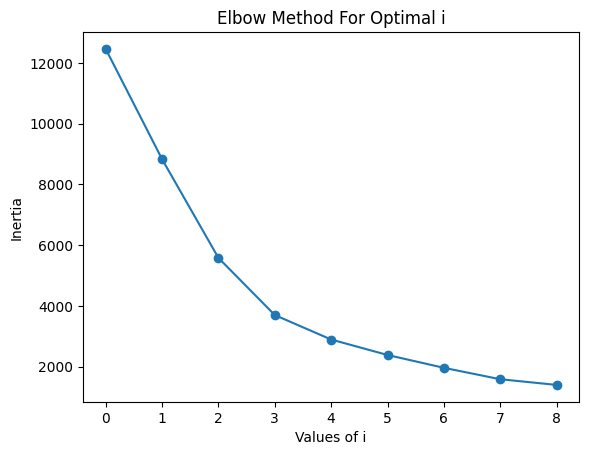

In [95]:
inertia = []
for i in np.arange(1,10):
    kmeans = KMeans(n_clusters =i)
    kmeans.fit(scaler)
    inertia.append(kmeans.inertia_)
plt.plot(inertia,marker='o')
plt.xlabel('Values of i') 
plt.ylabel('Inertia') 
plt.title('Elbow Method For Optimal i')
plt.show()

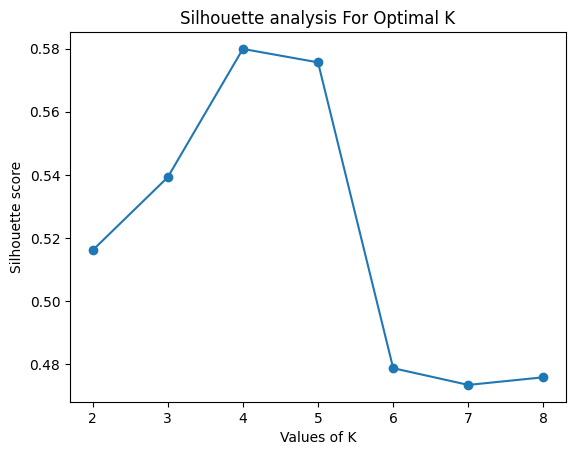

In [96]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaler)
    cluster_labels = kmeans.labels_    
    silhouette_avg.append(silhouette_score(scaler, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,marker='o')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal K')
plt.show()

In [97]:
km = KMeans(n_clusters = 4,random_state= 0)
labels = km.fit_predict(scaler)
RFM['Cluster'] = labels+1

In [98]:
RFM.groupby('Cluster').mean()

,Recency,Frequency,Monetary
Cluster,,,
1,41.293932,3.400561,936.282610
2,236.165725,1.521657,361.937731
3,13.130802,18.637131,6279.162194
4,1.500000,144.250000,47129.772500


**Observations**

Cluster 1: "Moderate Engagers"

Reasoning: Customers in this cluster have made moderately recent purchases and have a moderate purchase frequency and monetary value. They are engaged with the business but not as active as customers in other clusters.

Cluster 2: "Inactive Spenders"

Reasoning: Customers in this cluster have not made recent purchases and have a low purchase frequency and monetary value. They are less engaged with the business and are not spending as much as customers in other clusters.

Cluster 3: "High-Value Repeat Customers"

Reasoning: Customers in this cluster have made recent purchases, have a high purchase frequency, and have spent a significant amount of money. They are valuable customers who make repeated purchases and contribute to the business's revenue.

Cluster 4: "Super Active High Spenders"

Reasoning: Customers in this cluster have made very recent purchases, have an extremely high purchase frequency, and have spent a substantial amount of money. They are the most active and highest-spending customers in the dataset.

In [99]:
def func(row):
    if row['Cluster'] == 1:
        return 'Moderate Engagers'
    elif row['Cluster'] == 2:
        return 'Inactive Spenders'
    elif row['Cluster'] == 3:
        return 'High-Value Repeat Customers'
    else: 
        return 'Super Active High Spenders'
    
RFM['Type'] = RFM.apply(func,axis=1)

In [100]:
RFM = RFM.reset_index()
RFM

,CustomerID,Recency,Frequency,Monetary,Cluster,Type
0,12347.0,33,6,3243.62,1,Moderate Engagers
1,12348.0,242,2,37.40,2,Inactive Spenders
2,12349.0,12,1,1242.80,1,Moderate Engagers
3,12350.0,304,1,294.40,2,Inactive Spenders
4,12352.0,30,7,1385.74,1,Moderate Engagers
...,...,...,...,...,...,...
4149,18280.0,271,1,180.60,2,Inactive Spenders
4150,18281.0,174,1,31.80,2,Inactive Spenders
4151,18282.0,1,2,159.09,1,Moderate Engagers
4152,18283.0,3,15,1736.45,1,Moderate Engagers


In [101]:
result = RFM['Type'].value_counts()
result

Moderate Engagers              2851
Inactive Spenders              1062
High-Value Repeat Customers     237
Super Active High Spenders        4
Name: Type, dtype: int64

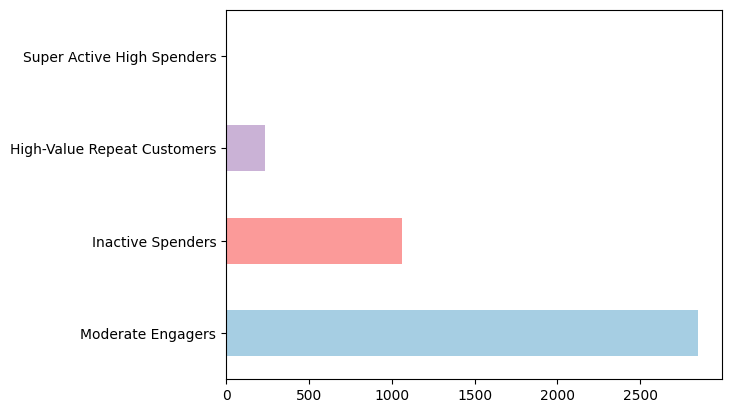

In [102]:
num_clusters = len(result)
cmap = plt.get_cmap('Paired')
colors = [cmap(i) for i in np.linspace(0, 1, num_clusters)]

result.plot(kind='barh', color=colors)
plt.show()

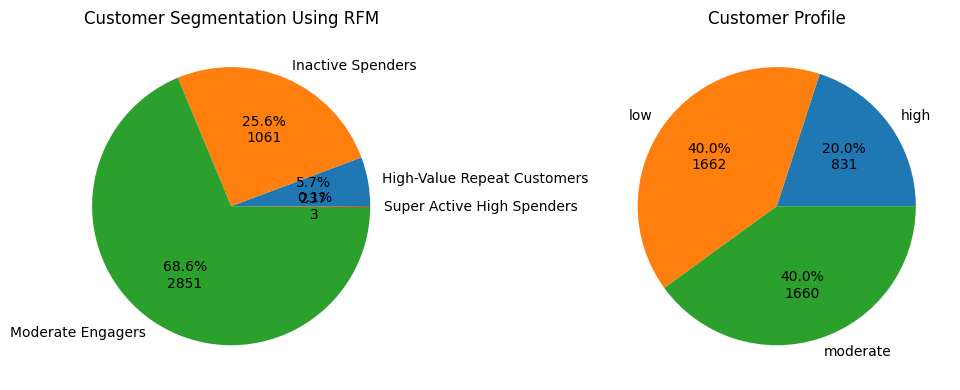

In [103]:
rfm_count = RFM.groupby('Type').agg({'CustomerID':'nunique'}).reset_index()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].pie(rfm_count['CustomerID'], labels=rfm_count['Type'], autopct=lambda pct: f"{pct:.1f}%\n{int(pct/100*sum(rfm_count['CustomerID']))}")
axs[1].pie(profile_count['CustomerID'], labels=profile_count['Profile_spend_year'], autopct=lambda pct: f"{pct:.1f}%\n{int(pct/100*sum(profile_count['CustomerID']))}")

# Add titles
axs[0].set_title('Customer Segmentation Using RFM')
axs[1].set_title('Customer Profile')

plt.tight_layout()

# Display the charts
plt.show()

**Summary**

The majority of customers are mederate engagers or dormant (Cluster 1), followed by inactive spenders customers (Cluster 2). A smaller segment of high-value repeat customers (Cluster 3) and a very small group of super active high spenders customers (Cluster 4) are also present. This information can help inform targeted marketing strategies and efforts to re-engage inactive customers, retain regular customers, and provide special attention to high-value customers.

There are also included the different between the customer profile and the customer segmentation. As we can see even the customers are being in the low spender profile, there are still probability that the customer were in moderate engagers segmentation. Therefore, the customer segmentation can provide the more information on our customer behaviour.

# Overall Conclusions

## EDA

<u>Analysis based on time period<u>


**Total payment in transaction per month**

- The total payment transactions exhibit fluctuations from month to month, indicating variations in profit. There are noticeable increases and decreases in profit over different periods. 

- Additionally, by analyzing the monthly profit figures, potential seasonal trends or patterns can be identified. If there is a consistent increase or decrease in profit during certain months, it may indicate the influence of seasonal factors. Understanding these seasonal trends can help in planning and adjusting business strategies accordingly. 
 
- Furthermore, it is important to identify peaks and troughs in the profit figures. Months with exceptionally high or low profits compared to the surrounding months can provide insights into events, campaigns, or external factors that impact the business during those periods. This information can be used to replicate successful strategies or address issues that may have caused negative impacts.

**Number of customers that do transaction per month**
    
- The customer count exhibits fluctuations from month to month, indicating variations in customer activity or behavior. This suggests that customer engagement and transactional activity can vary throughout the year. 
 
- Analyzing the monthly customer count figures, potential seasonal trends or patterns in customer behavior can be identified. Consistant increased and decreaase may indicate the influence of seasonal factors on customer engagement. Understanding these seasonal trends can help in planning marketing campaigns, promotions, and inventory management during specific periods. 
    
- Comparing the customer count figures over consecutive months can reveal trends in customer engagement growth or decline. This information is valuable for assessing the effectiveness of customer acquisition and retention strategies. Consistent increases in customer count may indicate successful acquisition efforts, while declines may signal a need to focus on customer retention strategies. 
    
- The data on customer count can also be used for forecasting and planning future ecommerce operations. By understanding the fluctuations and trends in customer count, businesses can allocate resources, adjust marketing strategies, and optimize customer engagement initiatives. This helps in ensuring that adequate resources are available to meet customer demands and that marketing efforts are targeted effectively.
    
    
<u>Analysis based on Customer Profile<u>

**Relationship between Customer Profile and Average Quantity**

The data is divided into three spending profiles: high, low, and moderate. These profiles indicate different spending levels for the given time period. 
- The "high" customer profile tends to have a consistent average quantity in their purchases. This suggests that customers in this profile consistently buy larger quantities of products. 
- The "moderate" customer profile exhibits some variation in average quantity. This indicates that customers in this profile may have different purchasing behaviors, with some buying larger quantities and others buying smaller quantities.  
- The "low" customer profile shows unpredictability in terms of average quantity. This suggests that customers in this profile have varying purchasing behaviors and may not follow a consistent pattern in terms of the quantities they purchase.

Additionally, by analyzing the "Month" column, it is possible to identify monthly trends and seasonal patterns. There may be certain months where the customer profiles, particularly the "low" profile, have higher or lower spending levels. These monthly trends and seasonality can provide insights into customer behavior and help in planning marketing strategies or adjusting inventory levels accordingly.

**Relationship between Customer Profile and Unit Price**

The data is categorized into three spending profiles: high, low, and moderate. These profiles suggest different spending levels for the given time period.

- The "high" spending profile tends to consistently purchase products at a higher average unit price. This suggests that customers in this profile have a higher spending capacity and are willing to pay more for the products they purchase.

- The "moderate" spending profile exhibits some variation in average unit price. This indicates that customers in this profile may have different spending behaviors, with some purchasing products at higher prices and others at lower prices. The average unit price for this profile may vary more compared to the "high" profile.

- The "low" spending profile shows unpredictability in terms of average unit price. This suggests that customers in this profile have varying spending behaviors and may not follow a consistent pattern in terms of the prices they are willing to pay. The average unit price for this profile may fluctuate more and be less predictable compared to the other profiles.

By analyzing the "Month" column, it is possible to identify monthly trends and seasonal patterns in average unit price. There may be certain months where all customer profiles experience higher or lower average unit prices. These monthly trends and seasonality can provide insights into customer behavior and help in planning pricing strategies or adjusting inventory levels accordingly.

**Relationship between Customer Profile and Returned Unit Price**
    
- The analysis of return patterns across different customer profiles reveals some interesting insights. The kernel density estimation (KDE) plots indicate that the price for returned units is similar across all customer profiles, suggesting a consistent return pattern regardless of the spending profile.

- The majority of returned units are from the cheaper priced units, specifically those priced less than $2.5. The relatively low quality of these cheap units could be a contributing factor to their higher return rates.

- Some expensive units are also being returned, although they are less common. The reasons for the returns of expensive units could vary and would require further investigation and data analysis to understand better.

- The quantity of units purchased also seems to have an impact on the number of returns. This suggests that customers who buy larger quantities may encounter more issues with the products they purchase, leading to a higher likelihood of returns.

## Hypotheses Testing

**Hypothesis 1 : Customers spend more in October/November compared to the other months in the current year.**

The analysis fails to reject the hypothesis. This indicates that Customers spend more in October/November compared to the other months in the current year. This suggests that there may have a specific seasonal pattern of increased spending during these months.

**Hypothesis 2 : Number of customers in end-of-year months is significantly more than other months.**

The analysis fails to reject the hypothesis. The number of customers in the end-of-year months is significantly higher than in the other months. This suggests that there may be a notable increase in customer activity or engagement during the end-of-year period.

**Hypothesis 3 : The 'high' customer profile spending quantities is greater than the others customer profile spending.**

The analysis fails to reject the hypothesis. The spending quantities of the "high" customer profile are substantially greater than those of the "moderate" customer profile and the "low" customer profile. This suggests that there may be a substantial difference in spending quantities among the customer profiles.

**Hypothesis 4 : The 'high' customer profile spending unit price is higher than the others customer profile spending.**

The analysis fails to reject the hypothesis. The 'high' customer profile spending unit price is higher than the 'moderate' customer profile spending on average and the 'low' customer profile spending on average. This suggests that there may be a significant disparity in unit prices among the customer profiles.

**Hypothesis 5 : The 'high' customer profile spending returned quantities is greater than the others customer profile spending.**

The analysis fails to reject the hypothesis. Therefore, the 'high' customer profile spending returned quantities is greater than the 'moderate' customer profile spending and the 'low' customer profile spending. This suggests that there may be a substantial difference in the number of returned quantities among the customer profiles.

## RFM Analysis

In conclusion, the RFM analysis has helped identify four distinct customer clusters:

- "Moderate Engagers": 

This cluster consists of customers who have made moderately recent purchases, with a moderate purchase frequency and monetary value. They are engaged with the business but not as active as customers in other clusters.

- "Inactive Spenders": 

Customers in this cluster have not made recent purchases and exhibit a low purchase frequency and monetary value. They are less engaged with the business and do not spend as much as customers in other clusters.

- "High-Value Repeat Customers": 

This cluster comprises customers who have made recent purchases, exhibit a high purchase frequency, and have spent a significant amount of money. They are valuable customers who make repeated purchases, contributing substantially to the business's revenue.

- "Super Active High Spenders": 

This cluster represents customers who have made very recent purchases, display an extremely high purchase frequency, and have spent a substantial amount of money. They are the most active and highest-spending customers in the dataset.

By understanding these customer clusters, you can tailor your marketing strategies and customer engagement approaches to cater to their specific needs and preferences. This segmentation can help optimize customer targeting, retention efforts, and overall business growth.

## Conclusion 

From the EDA to Segmentation chapter, we can see more detail on analysis for the customer behavior and spending pattern that can be used to classified  each customer to their cluster. EDA chapter, the data being analysed to get the picture or pattern with customer behavior. Then, the last chapter which is Segmentation, the customer being classifed with the same customer behavior. The segmentation show that inactive users have the most number compared to others. It is important for the business to devise strategies to re-engage and reactivate these customers to increase their activity and potentially regain their loyalty. 

# References

1. Customer Segementation vs Users Segmentation
   - Explore the different segmentation 
   - https://simonpenny.wordpress.com/2021/04/29/whats-the-difference-between-customer-segmentation-and-customer-personas/


2. EDA
    - Explore the key points in EDA
    - https://www.knowledgehut.com/blog/data-science/eda-data-science


3. What is Hypothesis Testing? Types and Methods
    - Explore the best Hypothesis Testing for the project
    - https://www.analyticssteps.com/blogs/what-hypothesis-testing-types-and-methods


4. Basic concept of RFM analysis
    - Explore the usage for RFM analysis
    - https://clevertap.com/blog/rfm-analysis/ 


5. RFM analysis 
    - Learn how to create the RFM analysis in coding.
    - https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/ 